In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from samples.rl import (
    ucb, 
    utils,
)
from samples.rl.bandit import (
    Bandit,
    BernoulliBandit
)
from samples.rl.epsilon_greedy import EpsilonGreedyAgent
from samples.rl.optimistic_initial_values import OptimisticInitialValuesAgent
from samples.rl.thompson_sampling import BayesianAgent


%matplotlib inline
plt.style.use('ggplot')

## Epsilon-Greedy

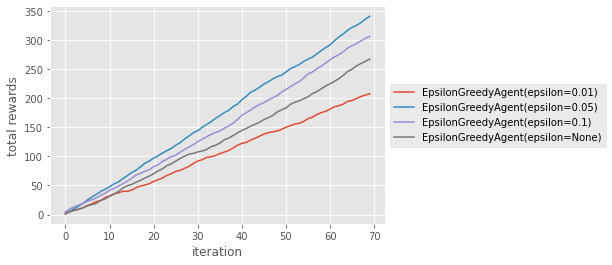

In [4]:
epsilons = [0.01, 0.05, 0.1, None]

agents = [EpsilonGreedyAgent(e) for e in epsilons]
bandits = [Bandit(m=mu) for mu in [3, 4, 5]]

iterations = 70
utils.compare_agents(agents, bandits, iterations)

In [5]:
for agent in agents:
    print('{}: Reward = {}'.format(agent, agent.rewards_log.total_rewards))

EpsilonGreedyAgent(epsilon=0.01): Reward = 207.85286714439445
EpsilonGreedyAgent(epsilon=0.05): Reward = 340.91742790596527
EpsilonGreedyAgent(epsilon=0.1): Reward = 306.49816272281635
EpsilonGreedyAgent(epsilon=None): Reward = 267.4521896969547


## Optimistic Initial Values

In [6]:
bandits = [Bandit(m=mu, lower_bound=0, upper_bound=10) for mu in [3, 5, 7, 9]]

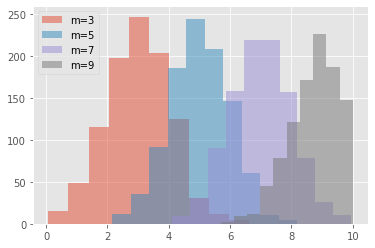

In [7]:
for b in bandits:
    plt.hist([b.pull() for _ in range(1000)], label='m={}'.format(b.m), alpha=0.5)
plt.legend()
plt.show()

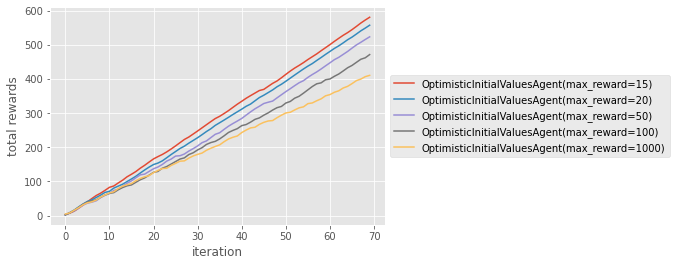

In [8]:
agents = [OptimisticInitialValuesAgent(max_reward=r) for r in [15, 20, 50, 100, 1000]]
iterations = 70
utils.compare_agents(agents, bandits, iterations)

## Optimistic Initial Values vs Epsilon-Greedy

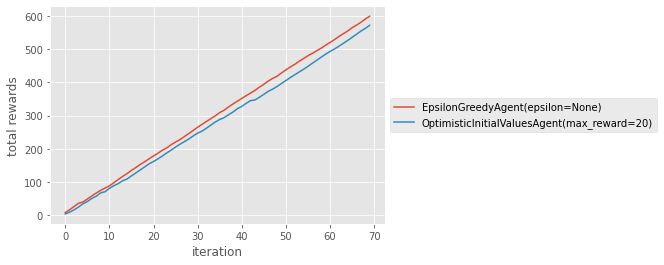

In [10]:
agents = [
    EpsilonGreedyAgent(),
    OptimisticInitialValuesAgent(max_reward=20)]

iterations = 70
utils.compare_agents(agents, bandits, iterations)

In [11]:
def run_comparison():
    win_count = [0, 0]
    
    for _ in range(1000):
        agents = [
            EpsilonGreedyAgent(epsilon=None),
            OptimisticInitialValuesAgent(max_reward=20)
        ]

        iterations = 100
        utils.compare_agents(agents, bandits, iterations, show_plot=False)
    
        rewards = [agent.rewards_log.total_rewards for agent in agents]
        win_count[np.argmax(rewards)] += 1
        
    return win_count

In [16]:
eps_successes, opt_successes = run_comparison()
print(eps_successes, opt_successes)

517 483


(array([  2.,   9.,  47., 146., 230., 263., 190.,  85.,  22.,   6.]),
 array([0.4617805 , 0.47226378, 0.48274706, 0.49323034, 0.50371362,
        0.5141969 , 0.52468018, 0.53516346, 0.54564674, 0.55613002,
        0.5666133 ]),
 <BarContainer object of 10 artists>)

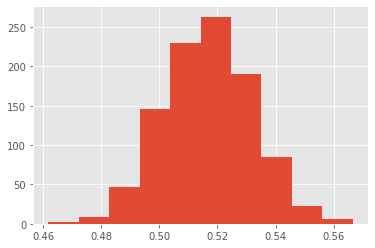

In [17]:
plt.hist(np.random.beta(eps_successes + 1, opt_successes + 1, size=1000))

## UCB

In [11]:
probs = [0.6, 0.7, 0.8, 0.9]
bernoulli_bandits = [BernoulliBandit(p) for p in probs]

means = [3, 5, 7, 9]
normal_bandits = [Bandit(m=m, sigma=1) for m in means]

In [12]:
def get_agents():
    agents = [
        EpsilonGreedyAgent(),
        ucb.UCB1Agent(),
        ucb.UCB1TunedAgent(),
        ucb.UCB1NormalAgent(),
    ]
    return agents

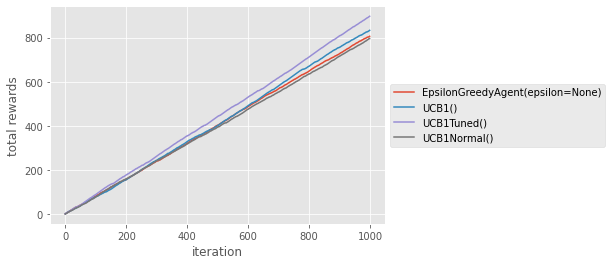

In [13]:
agents = get_agents()

utils.compare_agents(get_agents(), bernoulli_bandits, 1000, show_plot=True)

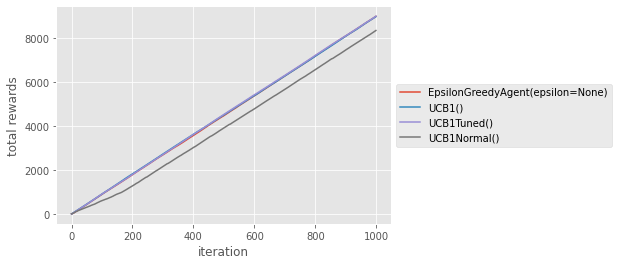

In [14]:
utils.compare_agents(get_agents(), normal_bandits, 1000, show_plot=True)

In [15]:
def run_comparison_ucb(bandits):
    win_count = [0, 0, 0, 0]
    
    for _ in range(1000):
        agents = get_agents()
        iterations = 1000
        utils.compare_agents(agents, bandits, iterations, show_plot=False)
    
        rewards = [agent.rewards_log.total_rewards for agent in agents]
        win_count[np.argmax(rewards)] += 1
        
    return win_count

In [16]:
wins = run_comparison_ucb(bernoulli_bandits)
for g, w in zip(get_agents(), wins):
    print(g, w)

EpsilonGreedyAgent(epsilon=None) 506
UCB1() 3
UCB1Tuned() 491
UCB1Normal() 0


In [17]:
wins = run_comparison_ucb(normal_bandits)
for g, w in zip(get_agents(), wins):
    print(g, w)

EpsilonGreedyAgent(epsilon=None) 171
UCB1() 364
UCB1Tuned() 465
UCB1Normal() 0


## Bayesian Bandits (Thompson Sampling)

In [2]:
probs = [0.6, 0.7, 0.8, 0.9]
bernoulli_bandits = [BernoulliBandit(p) for p in probs]

In [7]:
def get_agents():
    agents = [
        EpsilonGreedyAgent(),
        ucb.UCB1Agent(),
        ucb.UCB1TunedAgent(),
#         ucb.UCB1NormalAgent(),
        BayesianAgent('bernoulli')
    ]
    return agents


def run_comparison(bandits):
    win_count = [0] * len(get_agents())
    
    for _ in range(1000):
        agents = get_agents()
        iterations = 1000
        utils.compare_agents(agents, bandits, iterations, show_plot=False)
    
        rewards = [agent.rewards_log.total_rewards for agent in agents]
        win_count[np.argmax(rewards)] += 1
        
    return win_count

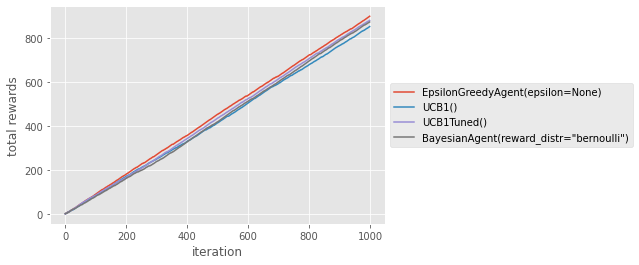

In [8]:
utils.compare_agents(get_agents(), bernoulli_bandits, 1000, show_plot=True)

In [10]:
wins = run_comparison(bernoulli_bandits)
for g, w in zip(get_agents(), wins):
    print(g, w)

EpsilonGreedyAgent(epsilon=None) 374
UCB1() 0
UCB1Tuned() 244
BayesianAgent(reward_distr="bernoulli") 382
